In [395]:
%matplotlib inline
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [396]:
Intentional_homicides = pd.read_csv("data_cts_intentional_homicide.csv")




C:\Users\tybar\AppData\Local\Temp\ipykernel_7836\2494688340.py:1: DtypeWarning: Columns (9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  Intentional_homicides = pd.read_csv("data_cts_intentional_homicide.csv")


In [397]:
#
Unfiltered = Intentional_homicides.groupby("Iso3_code")
s = Unfiltered.get_group("USA")["Value"].apply(lambda x: float(x)).sum()
s_len = len(Unfiltered.get_group("USA")["Value"])
# unit_per["Year"] = unit_per["Year"].apply(lambda x: int(x))
print(s/s_len)

1423.3354004841942


In [398]:
Intentional_homicides_filtered = Intentional_homicides.where(Intentional_homicides["Indicator"] == "Victims of intentional homicide")
Intentional_homicides_filtered = Intentional_homicides_filtered.where(Intentional_homicides_filtered["Dimension"] == "Total")

Intentional_homicides_filtered = Intentional_homicides_filtered.where(Intentional_homicides_filtered["Category"] == "Total")
Intentional_homicides_filtered = Intentional_homicides_filtered.where(Intentional_homicides_filtered["Age"] == "Total")
Intentional_homicides_filtered = Intentional_homicides_filtered.where(Intentional_homicides_filtered["Sex"] == "Total")


Intentional_homicides_filtered = Intentional_homicides_filtered.dropna()
# Intentional_homicides_filtered

unit_per = Intentional_homicides_filtered.where(Intentional_homicides_filtered["Unit of measure"] == "Rate per 100,000 population")
unit_per = unit_per.dropna()
unit_per

,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measure,Value,Source
77376,ABW,Aruba,Americas,Latin America and the Caribbean,Victims of intentional homicide,Total,Total,Total,Total,1990,"Rate per 100,000 population",0.0,MD
77377,AIA,Anguilla,Americas,Latin America and the Caribbean,Victims of intentional homicide,Total,Total,Total,Total,1990,"Rate per 100,000 population",0.0,WHO/NSO/SDG/PAHO
77378,ARM,Armenia,Asia,Western Asia,Victims of intentional homicide,Total,Total,Total,Total,1990,"Rate per 100,000 population",5.004865,UNSDC/TransMonEE/CTS/Covid-19/SDG
77379,ATG,Antigua and Barbuda,Americas,Latin America and the Caribbean,Victims of intentional homicide,Total,Total,Total,Total,1990,"Rate per 100,000 population",1.57908,MD/PAHO/OAS/CTS
77380,AUS,Australia,Oceania,Australia and New Zealand,Victims of intentional homicide,Total,Total,Total,Total,1990,"Rate per 100,000 population",2.193805,MD/Eurostat/GSH 2019 Revision/CTS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81484,VCT,Saint Vincent and the Grenadines,Americas,Latin America and the Caribbean,Victims of intentional homicide,Total,Total,Total,Total,2021,"Rate per 100,000 population",30.671318,NGO/OAS/CTS
81485,VEN,Venezuela (Bolivarian Republic of),Americas,Latin America and the Caribbean,Victims of intentional homicide,Total,Total,Total,Total,2021,"Rate per 100,000 population",19.305056,NGO/UNSDC/OAS/Attorney General/CTS/External
81486,XKX,Kosovo under UNSCR 1244,Europe,Southern Europe,Victims of intentional homicide,Total,Total,Total,Total,2021,"Rate per 100,000 population",1.985548,CTS
81487,ZAF,South Africa,Africa,Sub-Saharan Africa,Victims of intentional homicide,Total,Total,Total,Total,2021,"Rate per 100,000 population",41.865728,NP/CTS


In [422]:

unit_per = unit_per.dropna()
unit_per = unit_per[["Iso3_code","Country","Year","Value","Source", ]]
unit_per["Year"] = unit_per["Year"].apply(lambda x: float(x))

unit_per.sort_values(["Year"],ascending=True)
# for i,each in unit_per.iterrows():
#     if type(each["Year"]) == int:
#         print (type(each["Year"]))


,Iso3_code,Country,Year,Value,Source
77376,ABW,Aruba,1990.0,0.0,MD
77445,PHL,Philippines,1990.0,15.076618,NP/UNSDC/CTS/GSH 2019 Revision
77444,PAN,Panama,1990.0,11.347089,NSO/CTS/PPR
77443,PAK,Pakistan,1990.0,7.112651,UNSDC/NSO/NP/SDG
77442,NZL,New Zealand,1990.0,1.864611,WHO Adjusted/UNSDC/NP/CTS
...,...,...,...,...,...
81410,DZA,Algeria,2021.0,1.573182,CTS
81409,DOM,Dominican Republic,2021.0,10.541584,NGO/SES/CTS/RIC
81408,DNK,Denmark,2021.0,0.802837,GSH 2019 Revision/UNSDC/CTS/NSO
81419,GRD,Grenada,2021.0,4.012519,OAS/CTS/UNODC Research


In [400]:
unit_per_grouped = unit_per.groupby(["Year"])



In [401]:
# for i, group in unit_per:
#     print(group)
print(unit_per_grouped.get_group(1990))

      Iso3_code                             Country  Year      Value  \
77376       ABW                               Aruba  1990        0.0   
77377       AIA                            Anguilla  1990        0.0   
77378       ARM                             Armenia  1990   5.004865   
77379       ATG                 Antigua and Barbuda  1990    1.57908   
77380       AUS                           Australia  1990   2.193805   
...         ...                                 ...   ...        ...   
77466       VCT    Saint Vincent and the Grenadines  1990   9.778864   
77467       VEN  Venezuela (Bolivarian Republic of)  1990  12.526215   
77468       VGB              British Virgin Islands  1990   6.403483   
77469       ZMB                              Zambia  1990   7.155494   
77470       ZWE                            Zimbabwe  1990   5.803898   

                                            Source  
77376                                           MD  
77377                        

In [402]:
#creating a dictionary for just the one year objects
one_year_dict = dict()

for i, group in unit_per_grouped:
    one_year_dict[i[0]] = group
   

In [403]:
five_year_dict = dict()
year = min(unit_per_grouped["Year"])[0]
interval = 5

def get_group(d):
    year_group = (d - year) // interval
    return year_group

trial = get_group(2005)

#print(trial)
unit_per["5_year"] = unit_per["Year"].apply(lambda x: get_group(int(x)))
unit_per_5_grouped = unit_per.groupby("5_year")

# for i, g in unit_per_5_grouped:
#     print (g)

unit_per_5_grouped.groups      


{0: [77376, 77377, 77378, 77379, 77380, 77381, 77382, 77383, 77384, 77385, 77386, 77387, 77388, 77389, 77390, 77391, 77392, 77393, 77394, 77395, 77396, 77397, 77398, 77399, 77400, 77401, 77402, 77403, 77404, 77405, 77406, 77407, 77408, 77409, 77410, 77411, 77412, 77413, 77414, 77415, 77416, 77417, 77418, 77419, 77420, 77421, 77422, 77423, 77424, 77425, 77426, 77427, 77428, 77429, 77430, 77431, 77432, 77433, 77434, 77435, 77436, 77437, 77438, 77439, 77440, 77441, 77442, 77443, 77444, 77445, 77446, 77447, 77448, 77449, 77450, 77451, 77452, 77453, 77454, 77455, 77456, 77457, 77458, 77459, 77460, 77461, 77462, 77463, 77464, 77465, 77466, 77467, 77468, 77469, 77470, 77471, 77472, 77473, 77474, 77475, ...], 1: [77868, 77869, 77870, 77871, 77872, 77873, 77874, 77875, 77876, 77877, 77878, 77879, 77880, 77881, 77882, 77883, 77884, 77885, 77886, 77887, 77888, 77889, 77890, 77891, 77892, 77893, 77894, 77895, 77896, 77897, 77898, 77899, 77900, 77901, 77902, 77903, 77904, 77905, 77906, 77907, 77908

In [404]:
unit_per0 = unit_per.drop(columns="5_year")
unit_per_all_grouped = unit_per0.groupby("Iso3_code")


# unit_per_all_grouped.plot(x = "Year",y = "Value",kind = "scatter",subplots = False)


In [405]:
# Building the main dataframe

# get the max and min score for each year group
all_min = dict()
all_max = dict()
total_avg = dict()
for i, group in unit_per_all_grouped:
    low = min(group["Value"])
    high = max(group["Value"])
    avg = group["Value"].sum()/len(group["Value"])

    all_min[i] =low
    all_max[i] =high
    total_avg[i] =avg

#getting the max and min 5yr avg
min_5_year_avg = dict()
max_5_year_avg = dict()

unit_per_5_all_grouped =  unit_per.groupby(["5_year", "Iso3_code"])
for i, g, in unit_per_5_all_grouped:
    key = i[1]
    val = g["Value"].sum()/len(g["Value"])
    
    #get the minimum 5 year value
    if key not in min_5_year_avg:
        min_5_year_avg[key] = val
    else:
        if val < min_5_year_avg[key]:
            min_5_year_avg[key] = val
    #get the maximum 5 year value
    if key not in max_5_year_avg:
        max_5_year_avg[key] = val
    else:
        if val > max_5_year_avg[key]:
            max_5_year_avg[key] = val

# print(min_5_year_avg)
# print(max_5_year_avg)

# print(all_min)
# print(all_max)
# print(total_avg)
df_start = dict()
for country in all_min:
    df_start[country] = ({
        "all_min": all_min[country],
        "all_max" : all_max[country],
        "min_5_year_avg": min_5_year_avg[country],
        "max_5_year_avg" : max_5_year_avg[country],
        "total_avg" : total_avg[country]
        })



# df1 = pd.DataFrame.from_dict(data=[min_5_year_avg,max_5_year_avg],orient="index",columns=["all_min", "all_max"])
            
df = pd.DataFrame.from_dict(data=df_start, orient='index')


df

,all_min,all_max,min_5_year_avg,max_5_year_avg,total_avg
ABW,0.000000,7.787151,0.000000,5.044761,3.991505
AFG,3.487093,9.975262,4.071526,7.478469,6.015498
AGO,4.102248,4.831610,4.280242,4.590246,4.435244
AIA,0.000000,40.567951,4.057266,17.616980,10.219571
ALB,2.014340,40.999238,2.219870,18.840325,6.403945
...,...,...,...,...,...
XKX,1.422763,6.266046,2.100095,5.163660,3.253233
YEM,3.115745,6.311147,3.448122,5.578098,4.592230
ZAF,29.658684,61.103416,30.997379,60.009733,40.773318
ZMB,5.242158,11.142017,5.249803,10.222950,7.393560


In [406]:
#Dimensionality reduction for graphing


pca = PCA(2)
df1 = pca.fit_transform(df)





In [407]:
from sklearn.metrics import silhouette_score

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

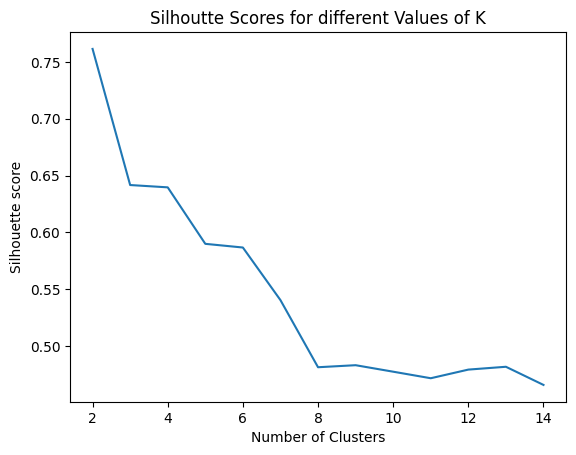

In [408]:
scores = list()
kmax = 15
for k in range(2,kmax):
    clusters = KMeans(n_clusters = k).fit_predict(df1)
    score = silhouette_score(df1,clusters)
    scores.append((k,score))



listcores=[]
for each in scores:
   listcores.append(each[1])

plt.plot(range(2,kmax),listcores)

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette score")
plt.title('Silhouette Scores for different Values of K')

plt.show()

In [423]:
kmeans = KMeans(n_clusters=8)
label = kmeans.fit_predict(df1)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [424]:
# Getting different colors for each cluster
import matplotlib.cm as cm
x = np.arange(10)
ys = [i+x+(i*x)**2 for i in range(10)]
colors = cm.rainbow(np.linspace(0, 1, len(ys)))

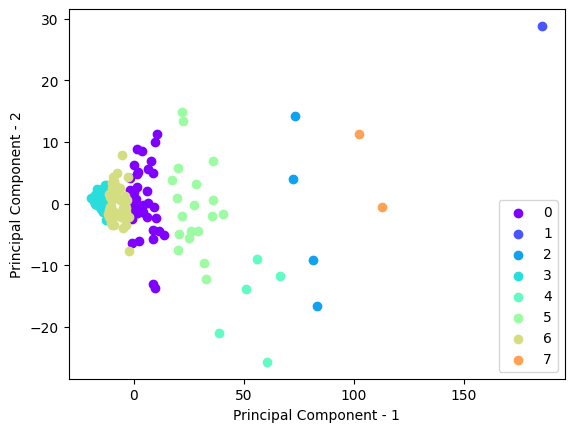

In [425]:
u_labels = np.unique(label)

for i, c in zip(u_labels,colors):
    plt.scatter(df1[label == i , 0] , df1[label == i , 1] , label = i, color = c)
plt.xlabel('Principal Component - 1',fontsize=10)
plt.ylabel('Principal Component - 2',fontsize=10)
plt.legend()
plt.show()

In [426]:
target_country = "CHL"
# target_country = "USA"
# target_country = "YEM"

In [413]:
# per_cluster_prs = []
# for cluster_id,group in df.groupby("Cluster"):

#     this_cluster_country_count = sum([
#         1 if target_country == country[0] else 0 
#         for country in group.iterrows()
#     ])
    
#     # Calculate conditional probability
#     pr_country_given_cluster = this_cluster_country_count / group.shape[0]
#     print("Pr[%s| Cluster %02d]:" % (target_country, cluster_id), "\t", pr_country_given_cluster)
    
#     # Calculate joint probability
#     joint_pr_country_cluster = pr_country_given_cluster * group.shape[0] / df.shape[0]
#     print("Pr[%s, Cluster %02d]:" % (target_country, cluster_id), "\t", joint_pr_country_cluster)
#     per_cluster_prs.append(joint_pr_country_cluster)

In [427]:
df["Cluster"] = label
df

,all_min,all_max,min_5_year_avg,max_5_year_avg,total_avg,Cluster
ABW,0.000000,7.787151,0.000000,5.044761,3.991505,6
AFG,3.487093,9.975262,4.071526,7.478469,6.015498,6
AGO,4.102248,4.831610,4.280242,4.590246,4.435244,6
AIA,0.000000,40.567951,4.057266,17.616980,10.219571,5
ALB,2.014340,40.999238,2.219870,18.840325,6.403945,5
...,...,...,...,...,...,...
XKX,1.422763,6.266046,2.100095,5.163660,3.253233,6
YEM,3.115745,6.311147,3.448122,5.578098,4.592230,6
ZAF,29.658684,61.103416,30.997379,60.009733,40.773318,2
ZMB,5.242158,11.142017,5.249803,10.222950,7.393560,0


In [428]:
cluster_groupings = df.groupby("Cluster")
for i, g in cluster_groupings:


    sample = g.sample(5) if len(g)> 4 else g.sample(len(g))
    print(sample)

      all_min    all_max  min_5_year_avg  max_5_year_avg  total_avg  Cluster
GRD  3.480743  14.224941        7.247926       10.208124   8.902191        0
SPM  0.000000  16.518005        8.255935        8.255935   8.255935        0
KAZ  3.192962  16.356200        3.192962       15.876121  11.111704        0
LKA  2.259749  11.537951        2.564990       11.537951   5.837264        0
LTU  2.583747  13.396428        3.082484       10.369486   7.606071        0
       all_min     all_max  min_5_year_avg  max_5_year_avg  total_avg  Cluster
SLV  18.165498  138.773986         19.7379      134.778654  68.901749        1
       all_min    all_max  min_5_year_avg  max_5_year_avg  total_avg  Cluster
KNA   6.599063  71.456343       13.237785       51.157279  30.132363        2
ZAF  29.658684  61.103416       30.997379       60.009733  40.773318        2
VEN  12.370086  63.027315       16.563276       52.891886  35.356018        2
JAM  22.742194  62.535886       25.348524       58.505662  42.478305

Cluster
0    [Axes(0.125,0.11;0.775x0.77)]
1    [Axes(0.125,0.11;0.775x0.77)]
2    [Axes(0.125,0.11;0.775x0.77)]
3    [Axes(0.125,0.11;0.775x0.77)]
4    [Axes(0.125,0.11;0.775x0.77)]
5    [Axes(0.125,0.11;0.775x0.77)]
6    [Axes(0.125,0.11;0.775x0.77)]
7    [Axes(0.125,0.11;0.775x0.77)]
dtype: object

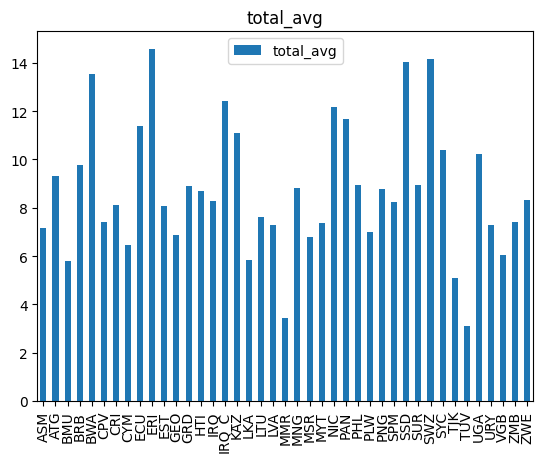

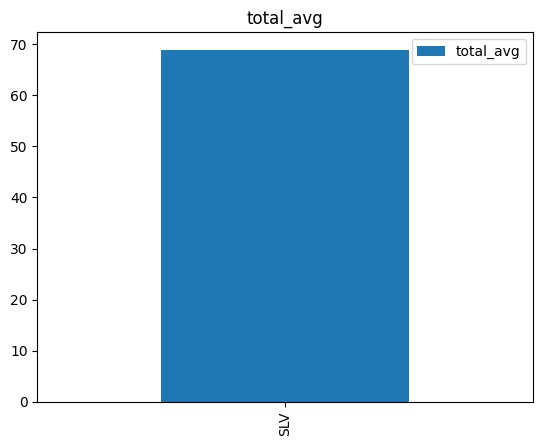

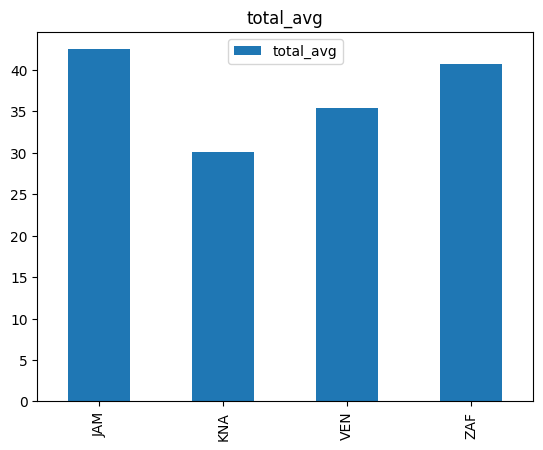

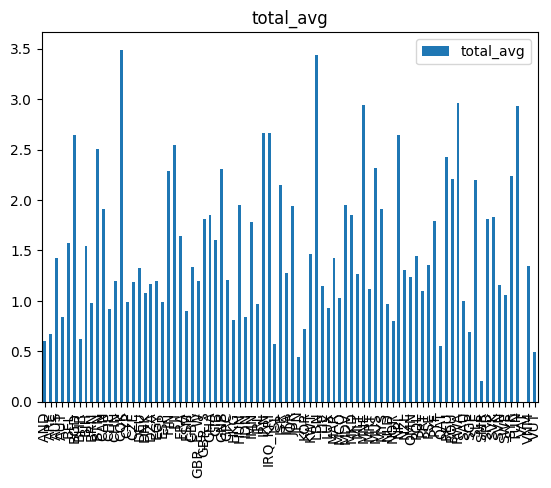

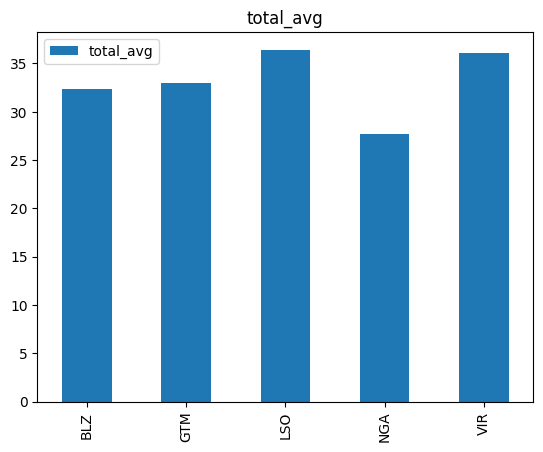

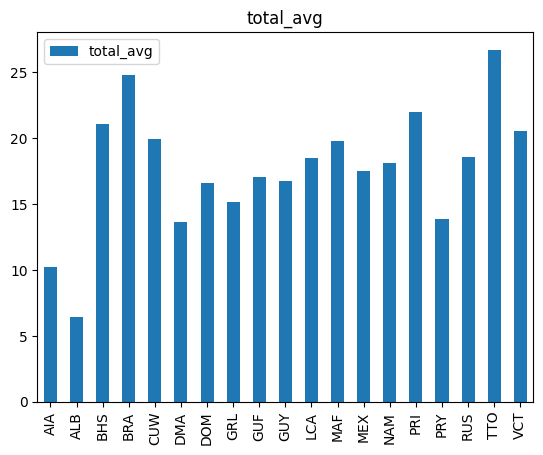

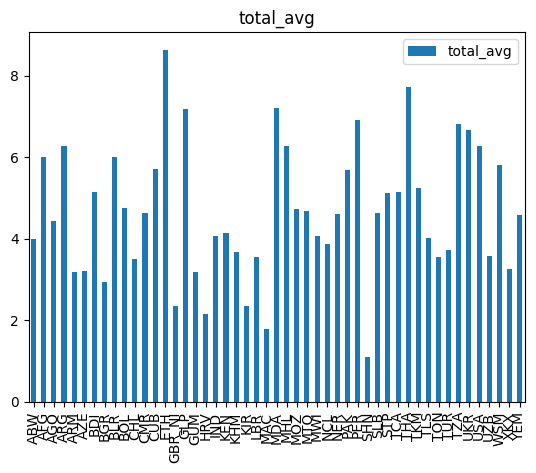

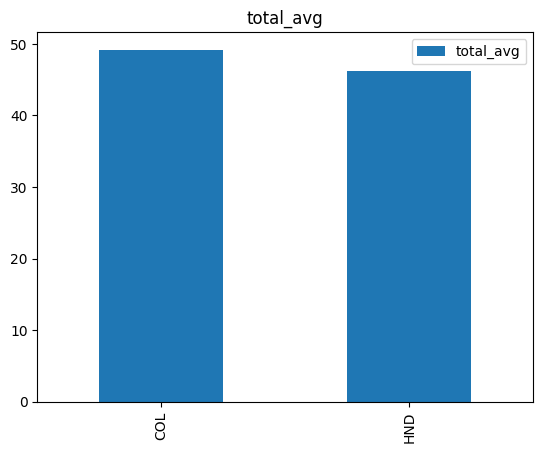

In [430]:
cluster_groupings.plot(y = "total_avg",kind = "bar",subplots = True)


array([<Axes: title={'center': 'total_avg'}, xlabel='Cluster'>],
      dtype=object)

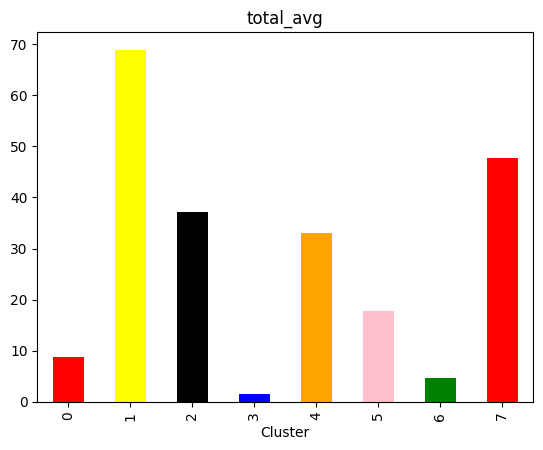

In [429]:
cluster_avgs = cluster_groupings.agg("mean")

col = ['red', 'yellow', 'black', 'blue', 'orange','pink','green']
cluster_avgs.plot(y = "total_avg",kind = "bar",subplots = True,color = col,legend=False)


In [ ]:
# some code that gets which cluster is the best/worst
#finds which cluster the target country is in
